In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


In [5]:
# Get the current working directory
current_directory = os.getcwd()

pricing_history = pd.read_csv("../data/transformed/pricing_history.csv")

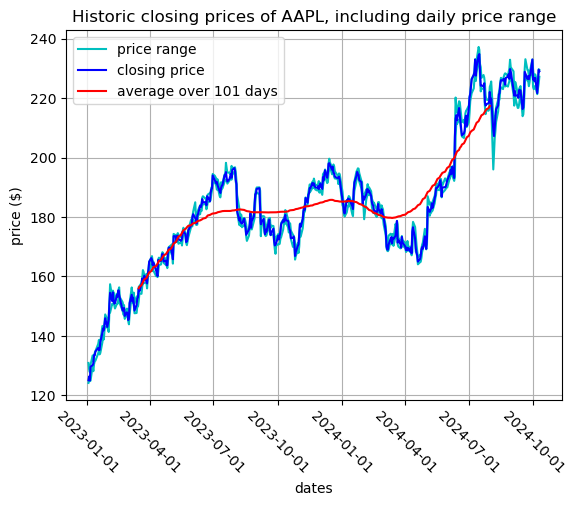

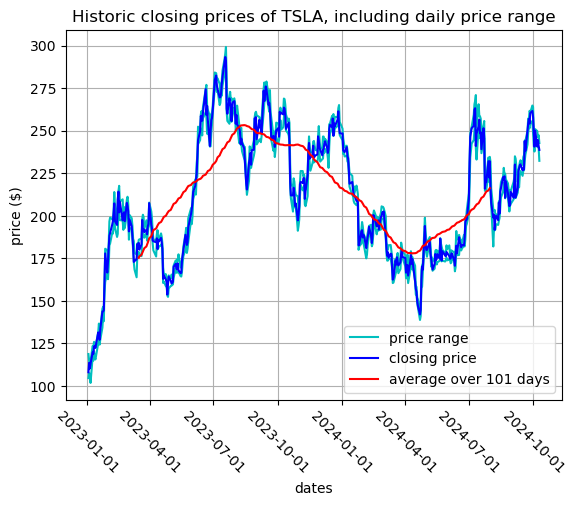

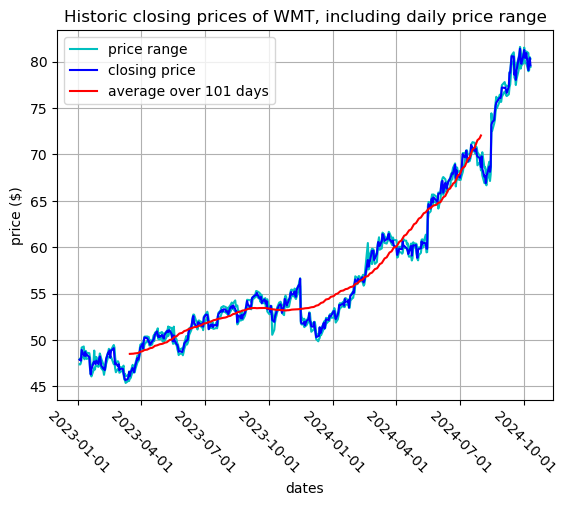

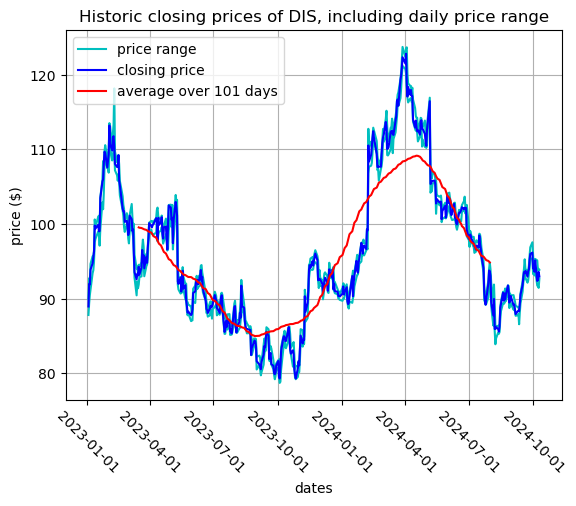

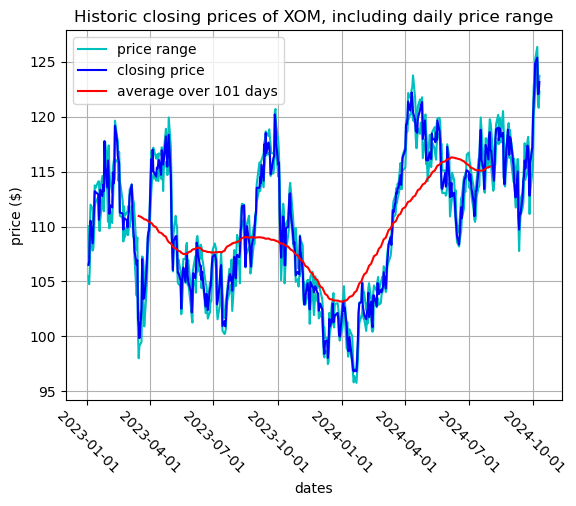

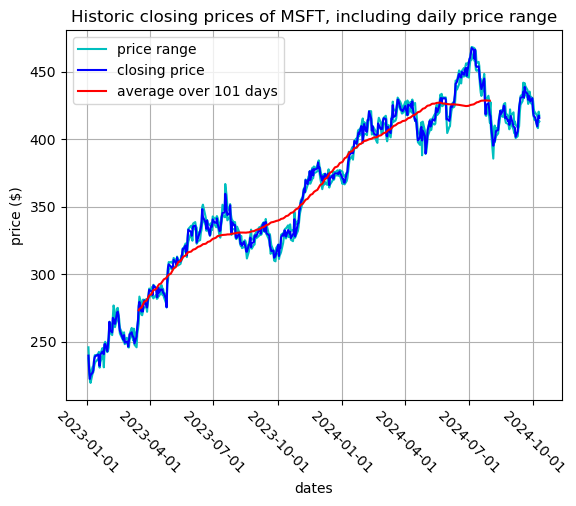

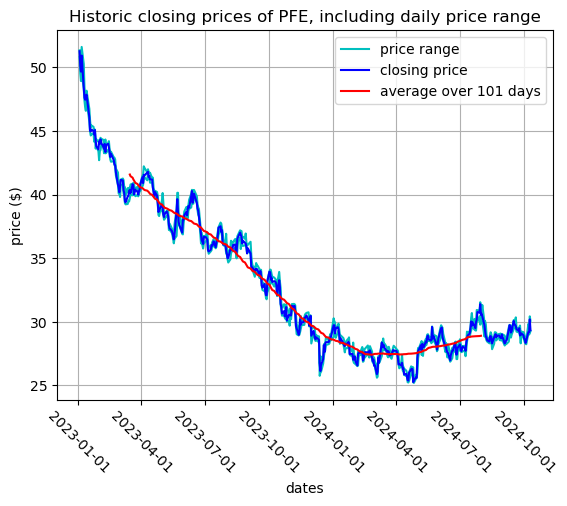

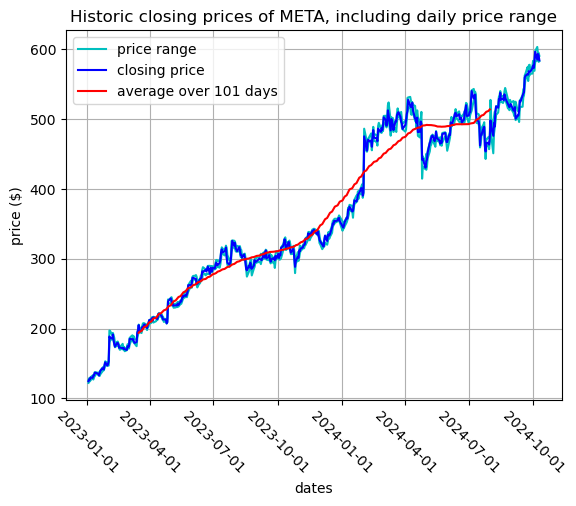

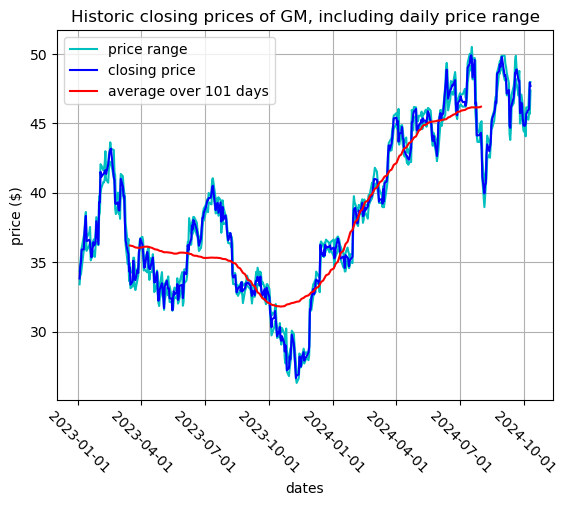

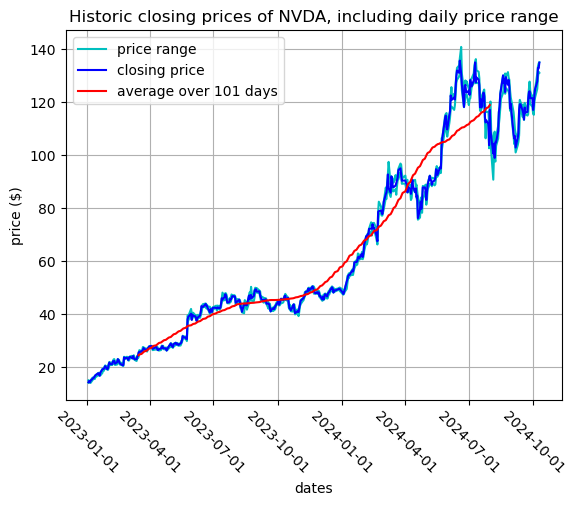

In [6]:
ticker_symbols = pricing_history['ticker_symbol'].unique()

avenr=50# days before AND after date that will be averaged to see more general trents, 
# e.g. avenr=3 will give the average over 7 days. 3 days infront, 3 days behind and the specific date

for i in ticker_symbols:  # from the data get the needed prices and dates from one stock via its ticker symbol
    hist_pri = (pricing_history[pricing_history['ticker_symbol'] == i])
    close = hist_pri['close']
    high = hist_pri['high']
    low = hist_pri['low']
    date = pd.to_datetime(hist_pri['date'])

    # the average closing price over 
    aveclose=[]
    for j in range(len(close)-avenr):
        if j >= avenr:
            aveclose.append(np.mean(close[j-avenr:j+avenr]))

    plt.plot(date, high, color='c', label='price range')
    plt.plot(date, low, color='c')
    plt.plot(date, close, color='b', label='closing price')
    plt.plot(date[avenr:-avenr], aveclose, color='r', label=f'average over {avenr*2+1} days')

    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically sets the date frequency
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formats dates

    plt.xticks(rotation=-45)
    plt.grid(True)

    plt.title('Historic closing prices of ' + i + ', including daily price range')
    plt.xlabel('dates')
    plt.ylabel('price ($)')
    plt.legend()

    plt.show()